In [3]:
pacman::p_load(Hmisc, ComplexHeatmap, circlize, tidyverse)

## Severe

In [66]:
met_info = read.csv("data/Metabolite_and_transcriptome/metabolite_info.csv")
met_tab = read.csv("data/Metabolite_and_transcriptome/metabolite_tab.csv", row.names = 1)

In [67]:
met_name = c('Xanthosine','Glycyl-leucine','Histidylleucine','Cimifugin','Docosahexaenoic Acid','8-Amino-7-oxononanoic acid',
    'Homo-L-arginine','N-Myristoyl Arginine','(S,S)-Butane-2,3-diol','PA(18:0/18:3(6Z,9Z,12Z))','2-Decyl-3-Hydroxypentanedioic Acid',
    '(5S,6R)-Methyl 5,6,7-trihydroxyheptanoate','N1-Acetylspermidine')

met_name %in% met_info$Metabolite
met_name_id = subset(met_info, Metabolite %in% met_name)$Metab.ID
met_tab = met_tab[met_name_id,] %>% as.matrix %>% t

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [79]:
subset(met_info, Metab.ID %in% colnames(met_tab))

,ID,Metabolite,Metab.ID,Library.ID,level,KEGG.Compound.ID,M.Z,Retention.time,Mode,Adducts,Formula,Fragmentation.Score,Theoretical.Fragmentation.Score,Mass.Error,CAS.ID,RSD
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
7,pos_1029,8-Amino-7-oxononanoic acid,metab_31,LMFA01060168;HMDB0240687,B(ii),C01092,170.1173,6.4979,pos,M+H-H2O,C9H17NO3,0.0,73.4,-1.5330445,682799-71-9,0.080624705
93,pos_1694,Homo-L-arginine,metab_682,HMDB0000670,B(ii),C01924,188.1278,6.5135,pos,M+,C7H16N4O2,0.0,50.5,2.5393503,156-86-5,0.020671242
150,pos_2006,N-Myristoyl Arginine,metab_1010,HMDB0242046,B(ii),-,385.3163,3.9111,pos,M+H,C20H40N4O3,0.0,85.1,-2.5610812,-,0.065963186
167,pos_2091,Glycyl-leucine,metab_1097,HMDB0000759;MJDBOTE0000578,B(i),C02155,189.1229,2.6646,pos,M+H,C8H16N2O3,95.8,0.0,-2.3635009,869-19-2,0.010316651
189,pos_2226,Histidylleucine,metab_1246,HMDB0028889;HMDB0253179,B(ii),C05010,269.1601,1.0820,pos,M+H,C12H20N4O3,0.0,52.4,-2.5011140,7763-65-7,0.026503745
201,pos_2264,"(S,S)-Butane-2,3-diol",metab_1288,-,B(i),C03046,73.0654,0.8311,pos,M+H-H2O,C4H10O2,56.2,0.0,6.6270603,19132-06-0,0.003201077
215,pos_2342,"(5S,6R)-Methyl 5,6,7-trihydroxyheptanoate",metab_1374,HMDB0247393,B(ii),-,210.1331,0.5754,pos,M+NH4,C8H16O5,0.0,34.8,-2.5237382,-,0.007229667
260,pos_450,N1-Acetylspermidine,metab_1871,HMDB0001276,B(i),C00612,188.1754,0.5128,pos,M+H,C9H21N3O,72.3,0.0,-1.6777927,14278-49-0,0.006874422
331,pos_908,Cimifugin,metab_2364,HMDB0250254,B(ii),C09000,676.2326,6.0936,pos,2M+ACN+Na,C16H18O6,0.0,63.8,-6.3075712,37921-38-3,0.072082281


In [71]:
asv_tab = read.csv("data/asv_table.csv",row.names = 1)
asv_name = c("ASV1","ASV184","ASV182","ASV179","ASV736","ASV294","ASV186","ASV793","ASV579","ASV930","ASV187","ASV737","ASV37","ASV799",
"ASV738","ASV802","ASV760","ASV739","ASV196","ASV38")

asv_tab = asv_tab[asv_name,] %>% as.matrix %>% t

In [ ]:
gene_tab = read.csv("data/Metabolite_and_transcriptome/gene_tpm.csv",row.names = 1)
gene_info = read.csv("data/Metabolite_and_transcriptome/gene_name.csv")
gene_name = c('Col10a1','Ucp1','Col2a1','Ucma','Meltf','Gm43546','Pgc','Cyp4a14','Gm18342','Dynap','Mup18','Kng1','Nt5e','Mup19','Mup17')
gene_name %in% gene_info$Gene.name
gene_name_id = subset(gene_info, Gene.name %in% gene_name)$Gene.id
gene_tab = gene_tab[gene_name_id,] %>% as.matrix %>% t
colnames(gene_tab) = gene_name

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [102]:
res = rcorr(scale(asv_tab[1:6,]), scale(met_tab[1:6,]), type = "spearman")
rr = res$r
pp = res$P

write.csv(rr,"data/Correlation_heatmap/Severe_asv_metabolite_r.csv")
write.csv(pp,"data/Correlation_heatmap/Severe_asv_metabolite_p.csv")

Warning message in sqrt(npair - 2):
"NaNs produced"


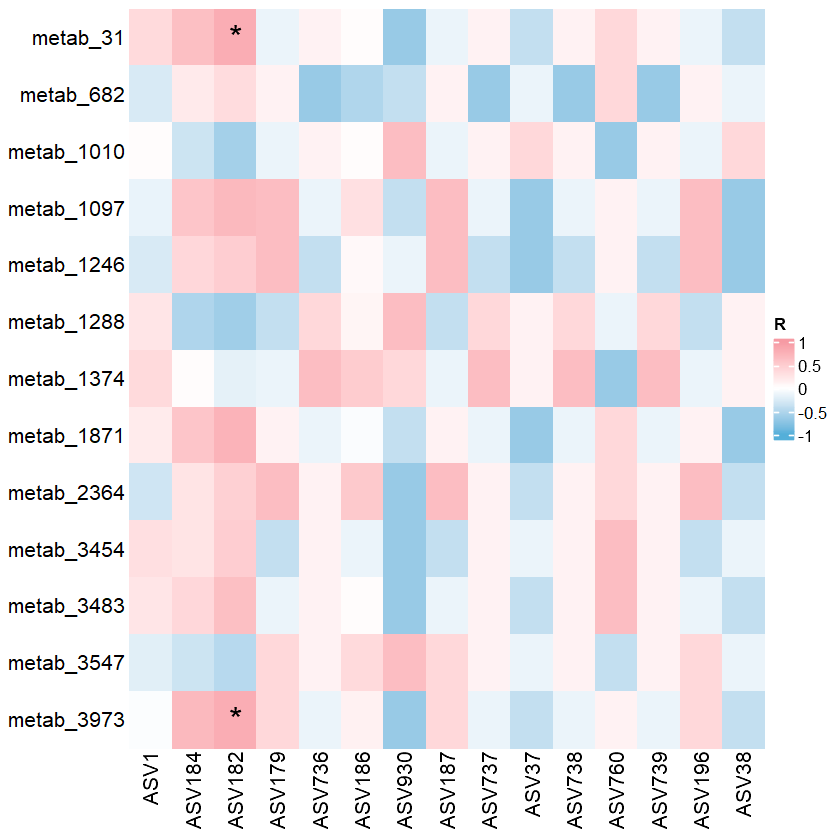

In [89]:
rr = read.csv("data/Correlation_heatmap/Severe_asv_metabolite_r.csv",row.names = 1,header = T)
pp = read.csv("data/Correlation_heatmap/Severe_asv_metabolite_p.csv",row.names = 1,header = T)
pmt = as.matrix(pp)
if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

Heatmap(as.matrix(rr), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F, 
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

In [122]:
res = rcorr(scale(asv_tab), scale(gene_tab), type = "spearman")
rr = res$r
pp = res$P

write.csv(rr,"data/Correlation_heatmap/Severe_asv_gene_r.csv")
write.csv(pp,"data/Correlation_heatmap/Severe_asv_gene_p.csv")

Warning message in sqrt(npair - 2):
"NaNs produced"


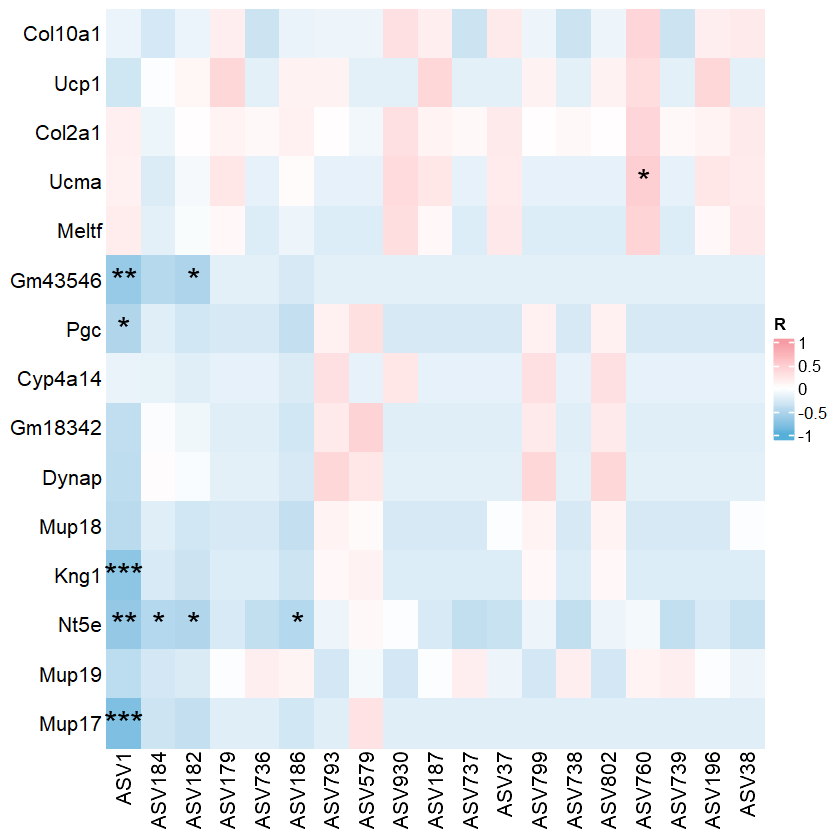

In [123]:
rr = read.csv("data/Correlation_heatmap/Severe_asv_gene_r.csv",row.names = 1,header = T)
pp = read.csv("data/Correlation_heatmap/Severe_asv_gene_p.csv",row.names = 1,header = T)

pmt = as.matrix(pp)
if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

Heatmap(as.matrix(rr), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F, 
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

In [166]:
library(readxl)

In [246]:
mid_met_name = read_excel("F:/Data/杂/yin/相关性热图/202506热图/Middle_enriched_metabolite.xlsx")
mil_met_name = read_excel("F:/Data/杂/yin/相关性热图/202506热图/Mild_enriched_metabolite.xlsx")
mid_gene_name = read.csv("F:/Data/杂/yin/相关性热图/202506热图/Middle_enrich_gene.csv")
mil_gene_name = read.csv("F:/Data/杂/yin/相关性热图/202506热图/Mild_enrich_gene.csv")

In [247]:
met_table = read.csv("data/Metabolite_and_transcriptome/metabolite_tab.csv",row.names = 1)
met_info = read.csv("data/Metabolite_and_transcriptome/metabolite_info.csv")
mid_met_name = left_join(mid_met_name, met_info[,2:3], by = "Metabolite")
mil_met_name = left_join(mil_met_name, met_info[,2:3], by = "Metabolite")

asv_table = read.csv("data/asv_table.csv",row.names = 1)
gene_table = read.csv("data/Metabolite_and_transcriptome/gene_tpm1.csv",row.names = 1)

group = read.csv("data/Metabolite_and_transcriptome/group.csv")

In [249]:
met_table = met_table[,group$sample]
asv_table = asv_table[,group$sample]
gene_table = gene_table[,group$sample]

In [250]:
mid_met = met_table[mid_met_name$Metab.ID,]
mid_asv = asv_table[mid_asv_name,]
mid_gene = gene_table[mid_gene_name$Gene.id,]
mil_met = met_table[mil_met_name$Metab.ID,]
mil_asv = asv_table[mil_asv_name,]
mil_gene = gene_table[mil_gene_name$Gene.id,]

In [251]:
mid_asv = t(mid_asv)
mid_gene = t(mid_gene)
mid_met = t(mid_met)
mil_asv = t(mil_asv)
mil_gene = t(mil_gene)
mil_met = t(mil_met)

## Middle

In [262]:
cor_met_asv = rcorr(as.matrix(mid_asv), as.matrix(mid_met), type = "pearson")
r = cor_met_asv$r
p = cor_met_asv$P

write.csv(r,"data/Correlation_heatmap/Middle_asv_metabolite_r.csv")
write.csv(p,"data/Correlation_heatmap/Middle_asv_metabolite_p.csv")

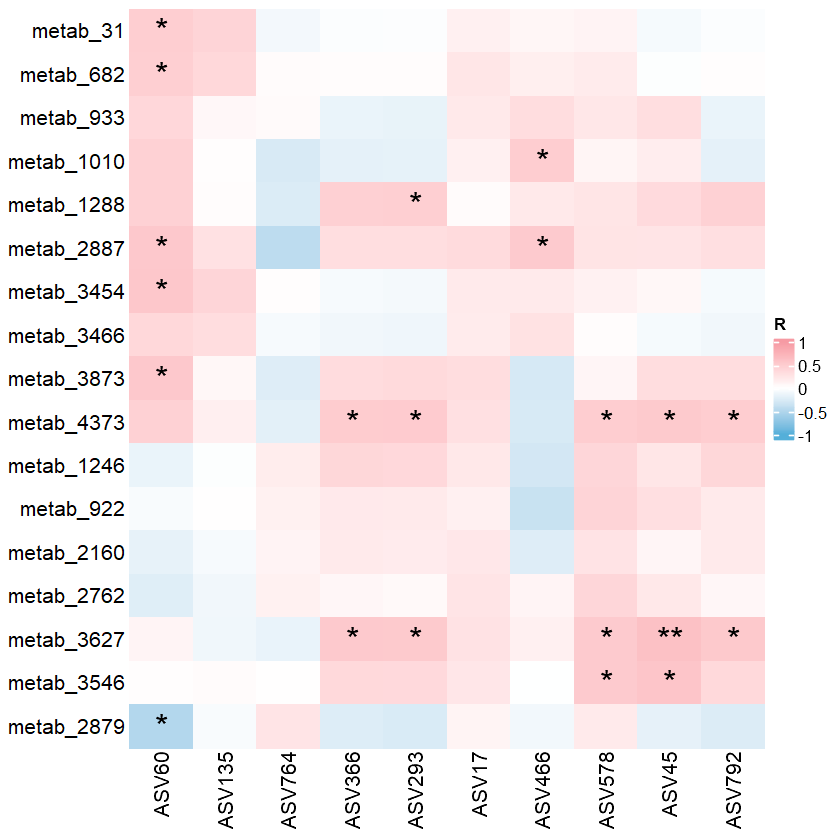

In [ ]:
r = read.csv("data/Correlation_heatmap/Middle_asv_metabolite_r.csv", row.names = 1)
p = read.csv("data/Correlation_heatmap/Middle_asv_metabolite_p.csv", row.names = 1)
pmt = as.matrix(p)

if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

colors = colorRamp2(c(-1,0,1),c("#54afd9","white","#f69aa3"))
Heatmap(as.matrix(r), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F,
        # row_split = r_group$group,
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

In [256]:
cor_met_asv = rcorr(as.matrix(mid_asv), as.matrix(mid_gene), type = "pearson")
r = cor_met_asv$r
p = cor_met_asv$P

write.csv(r,"data/Correlation_heatmap/Middle_asv_gene_r1.csv")
write.csv(p,"data/Correlation_heatmap/Middle_asv_gene_p1.csv")

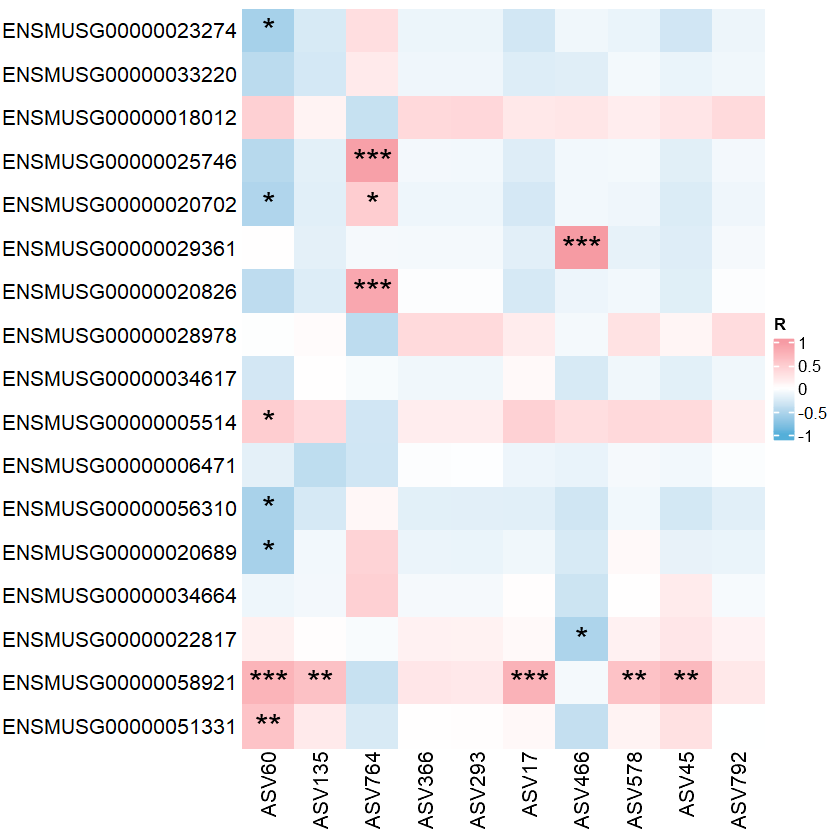

In [257]:
r = read.csv("data/Correlation_heatmap/Middle_asv_gene_r1.csv", row.names = 1, header = T)
p = read.csv("data/Correlation_heatmap/Middle_asv_gene_p1.csv", row.names = 1, header = T)
pmt = as.matrix(p)

if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

colors = colorRamp2(c(-1,0,1),c("#54afd9","white","#f69aa3"))
Heatmap(as.matrix(r), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F,
        # row_split = r_group$group,
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

In [ ]:
r = read.csv("data/Correlation_heatmap/Middle_asv_gene_r.csv", row.names = 1, header = T)
p = read.csv("data/Correlation_heatmap/Middle_asv_gene_p.csv", row.names = 1, header = T)
pmt = as.matrix(p)

if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

colors = colorRamp2(c(-1,0,1),c("#54afd9","white","#f69aa3"))
Heatmap(as.matrix(r), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F,
        # row_split = r_group$group,
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

## Mild

In [260]:
cor_met_asv = rcorr(as.matrix(mil_asv), as.matrix(mil_met), type = "pearson")
r = cor_met_asv$r
p = cor_met_asv$P

write.csv(r,"data/Correlation_heatmap/Mild_asv_metabolite_r.csv")
write.csv(p,"data/Correlation_heatmap/Mild_asv_metabolite_p.csv")


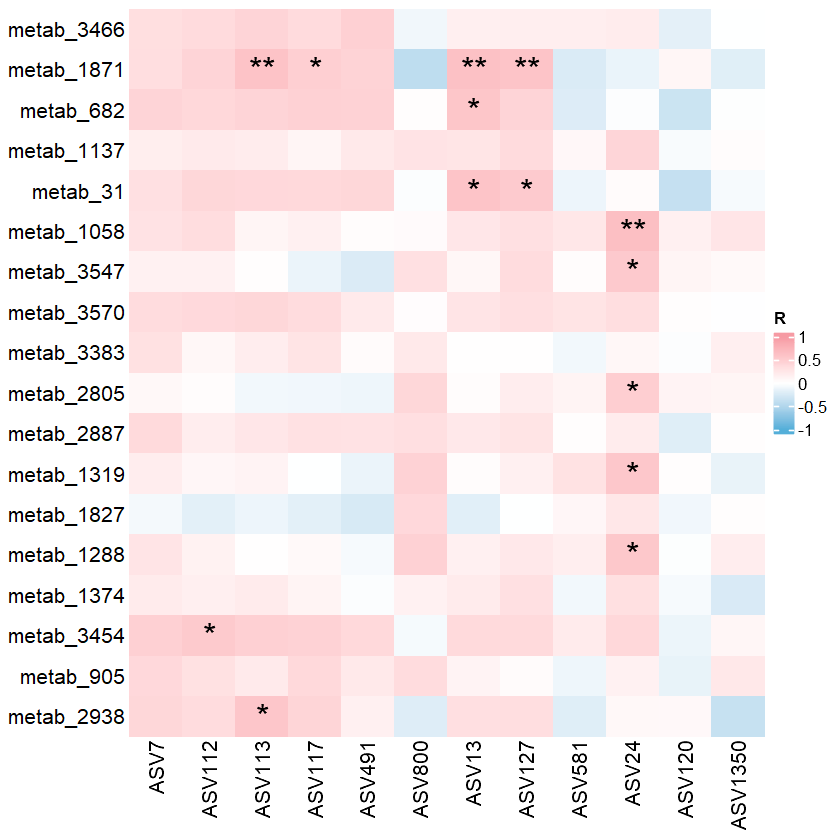

In [261]:
r = read.csv("data/Correlation_heatmap/Mild_asv_metabolite_r.csv", row.names = 1)
p = read.csv("data/Correlation_heatmap/Mild_asv_metabolite_p.csv", row.names = 1)
pmt = as.matrix(p)

if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

colors = colorRamp2(c(-1,0,1),c("#54afd9","white","#f69aa3"))
Heatmap(as.matrix(r), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F,
        # row_split = r_group$group,
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)

In [ ]:
cor_met_asv = rcorr(as.matrix(mil_asv), as.matrix(mil_gene), type = "pearson")
r = cor_met_asv$r
p = cor_met_asv$P

write.csv(r,"data/Correlation_heatmap/Mild_asv_gene_r.csv")
write.csv(p,"data/Correlation_heatmap/Mild_asv_gene_p.csv")


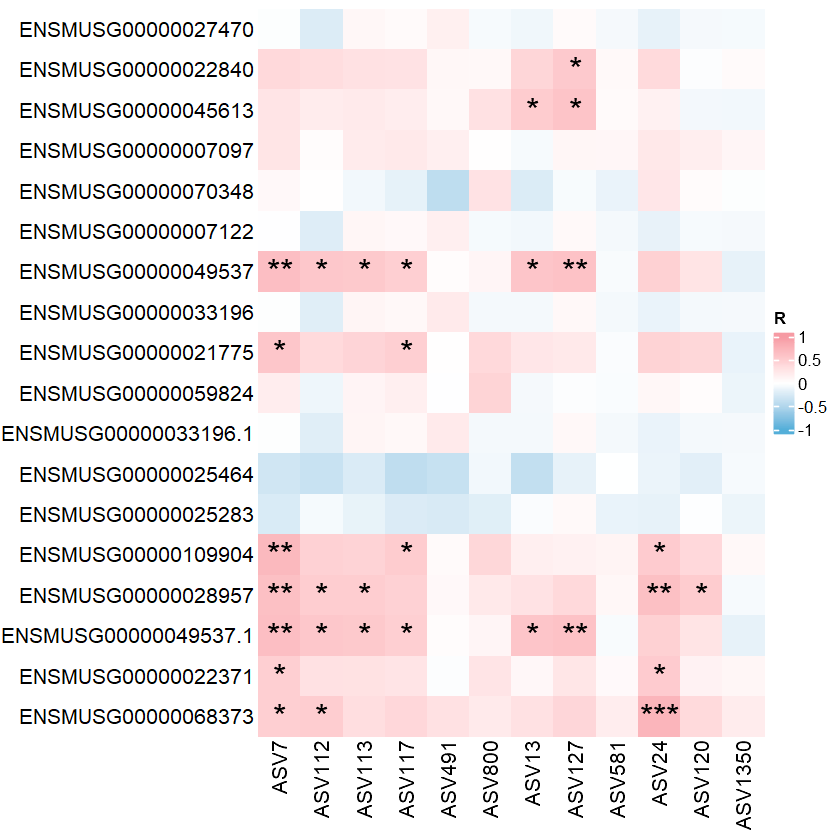

In [189]:
r = read.csv("data/Correlation_heatmap/Mild_asv_gene_r.csv", row.names = 1)
p = read.csv("data/Correlation_heatmap/Mild_asv_gene_p.csv", row.names = 1)
pmt = as.matrix(p)

if(!is.null(pmt)){
    sssmt = pmt < 0.001
    pmt[sssmt] = "***"
    ssmt = pmt < 0.01 & pmt >= 0.001
    pmt[ssmt] = "**"
    smt = pmt < 0.05 & pmt >= 0.01
    pmt[smt] = "*"
    pmt[!sssmt&!ssmt&!smt] = ""
} else {
   pmt = F
}

colors = colorRamp2(c(-1,0,1),c("#54afd9","white","#f69aa3"))
Heatmap(as.matrix(r), name = "R", show_row_names = T, 
        show_column_names = T, cluster_rows = F, 
        cluster_columns = F,
        # row_split = r_group$group,
        layer_fun = function(j, i, x, y, width, height, fill){
                grid.text(sprintf("%s", pindex(pmt, i, j)), 
                          x, 
                          y, 
                          gp = gpar(fontsize = 20))
        },
        row_names_side = "left",col = colors)